<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Continunity and Differentiation

3.2.1 Limits and Continuity

Theorem - Let $f:D \to ℝ$ be a real-valued, continuous function on a nonempty, closed, bounded set $D⊆ℝ^d$. Then f attains a maximum and a minimum on D.

In [ ]:
#calculate the limit of a function
from sympy import *
import numpy as np

x = symbols('x')
y = 1/x**2
limit(y, x, 0)

oo

3.2.2 Derivatives

Def. Derivative - Let $f:D \to ℝ$ where $D⊆ℝ$ and let $x_0\in D$ be an interior point of D. The derivative of f at $x_0$ is $f'(x_0) = \frac{df(x_0)}{dx} = lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}$, provided the limit exists.

In [ ]:
#calculate the diff of a function
from sympy import *
import numpy as np

x = symbols('x')
y = x**2 + 2
y.diff(x)

2*x

Roll's Theorem - Let $f:[a,b] \to ℝ$ be a continuous function and assume that its derivative exists on (a,b). If $f(a)=f(b)$, then there is $a < c < b$ such that $f'(c) = 0$

Mean Value Theorem - Let $f:[a,b] \to ℝ$ be a continuous function and assume that its derivative exists on (a,b). Then there is $a < c < b$ such that $f(b) = f(a) + (b-a)f'(c)$.

Def. Partial Derivative - Let $f:D\to ℝ$ where $D⊆ℝ^d$ and let $x_0\in D$ be an interior point of D. The partial derivative of f at $x_0$ with respect to $x_i$ is $\frac{∂f(x_0)}{∂x_i} = lim_{h\to 0}\frac{f(x_0+he_i)-f(x_0)}{h}$, provided the limit exists.

In [ ]:
#calculate the partical diff of a function
from sympy import *
import numpy as np

x, y = symbols('x y')
expr = x**2 + 2 * y + y**3
Derivative(expr, x)

Derivative(x**2 + y**3 + 2*y, x)

3.2.3 Taylor's theorem

Taylor's Theorem - Let $f:[a,b] \to ℝ$ where $D⊆ℝ^d$. Suppose f has a m times continuous derivative on [a,b]. Then $f(b) = f(a)+(b-a)f'(a)+\frac{1}{2}(b-a)^2f''(a)+...+\frac{(b-a)^{m-1}}{(m-1)!}f^{(m-1)}(a)+R_m$, where $R_m=\frac{(b-a)^m}{(m)!}f^{(m)}(a+θ(b-a))$ for some $0 < θ < 1$.

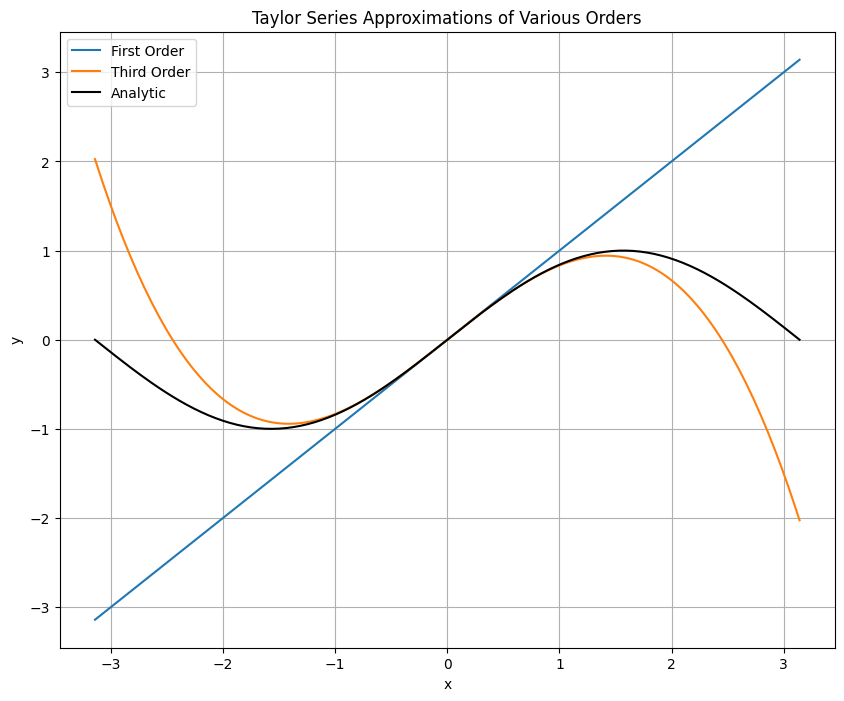

In [ ]:
#approximate a function with taylor's theorem
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(2), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 3.3 Unconstrained Optimization

3.3.1 Necessary and Sufficent Conditions of Local Minimizers

Def. Global minimizer - Let $f:ℝ^d \to ℝ$. The point $x^* \in ℝ^d$ is a global minimizer of f over $ℝ^d$ if $f(x) \geq f(x^*), \forall x\in ℝ^d$.

Def. Local minimizer - Let $f:ℝ^d \to ℝ$. The point $x^* \in ℝ^d$ is a local minimizer of f over $ℝ^d$ if there is $δ>0$ such that $f(x)\geq f(x^*), \forall x \in B_δ(x^*) \backslash\{x^*\}$

3.3.2 Convexity Global Minimizers

A real-valued function is called convex if the line segment between any two
points on the graph of the function lies above the graph between the two
points.

Def. Convex Function - A function $f:ℝ^d \to ℝ$ is convex if, for all $x,y\in ℝ^d$ and all $a\in[0,1]$, $f((1-a)x+ay)\leq (1-a)f(x)+af(y)$.



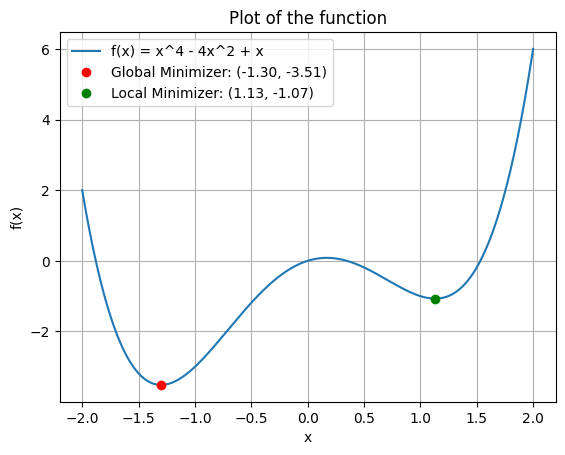

In [42]:
#Find the local and gloable min

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function
def f(x):
    return x**4 - 3*x**2 + x

# Generate x values for plotting
x_values = np.linspace(-2, 2, 500)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^4 - 4x^2 + x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.grid(True)
plt.legend()

# Find global minimum using optimization
result_global = minimize(f, x0=0)  # Start from x=0
x_global_min = result_global.x
y_global_min = result_global.fun

# Plot global minimum
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min[0]:.2f}, {y_global_min:.2f})')

# Find local minimum using optimization (starting from x=2)
result_local = minimize(f, x0=2)
x_local_min = result_local.x
y_local_min = result_local.fun

# Plot local minimum
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min[0]:.2f}, {y_local_min:.2f})')
plt.legend()
plt.show()


3.3.3 Gradient Descent

Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function.

Theorem - Suppose that $f:ℝ^d \to ℝ$ is twice continuously differentiable. The step size is chosen to minimize $a_k = arg\ min_{a>0}f(x^k-a∇f(x^k))$. Then steepest descent started from any $x^0$ produces a sequence $x^k$, k=1,2,... such that if $∇f(x^k)\neq 0$, then $f(x^{k+1})\leq f(x^k),
\forall k\geq 1$.